In [55]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import seaborn as sns

In [56]:
# 데이터 로드
data = pd.read_csv('Mall_Customers.csv')

In [57]:
print(data.shape)
print(data.info())
print(data.head())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [58]:
# 데이터 전처리/스케일링/분리
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

x_train, x_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

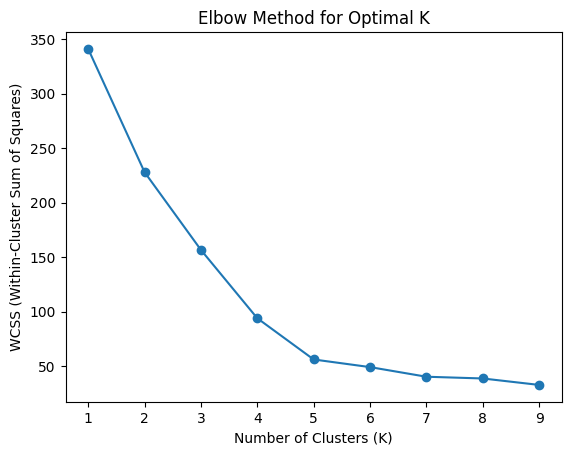

In [59]:
# 최적 k값 탐색
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x_train)
    wcss.append(kmeans_temp.inertia_)

# 엘보우 그래프
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# k=5 까지 급격하게 inertia가 감소하는 것을 볼 수 있다 따라서 최적의 k값은 5로 채택한다.

In [18]:
# K-Means 클러스터링 모델 생성
# k를 5로 설정하여 학습 실시
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_train)



KMeans(n_clusters=5, random_state=42)

In [19]:
# 훈련 데이터에 대한 클러스터링 결과 저장
y_train = kmeans.labels_
print(y_train)

[0 3 1 1 0 3 2 2 3 0 0 3 2 0 0 0 4 0 4 0 3 0 2 1 2 0 1 3 0 4 0 3 4 2 0 0 1
 3 0 0 1 0 0 3 3 0 3 1 4 0 1 3 0 2 2 4 3 1 2 0 1 1 0 3 0 4 1 0 0 4 4 1 4 3
 0 3 0 1 3 1 1 0 3 4 2 2 4 3 0 2 4 0 0 4 0 4 2 0 0 3 4 4 3 0 0 1 2 0 0 0 4
 3 0 1 2 0 3 3 2 0 3 4 3 3 0 0 0 0 4 0 0 0 2 0 4 4 3 2 3 3 2 0 3 4 3 0 0 0
 0 0 0 3 1 4 0 0 1 0 3 0]


In [20]:
# 테스트 데이터에 대한 클러스터링 결과 할당
y_test = kmeans.predict(x_test)
print(y_test)

[0 2 1 4 4 0 0 4 4 2 0 4 3 0 4 3 0 4 0 0 4 1 4 0 0 0 0 0 3 0 2 1 0 0 4 0 3
 3 4 0]


Overall Silhouette Score: 0.57


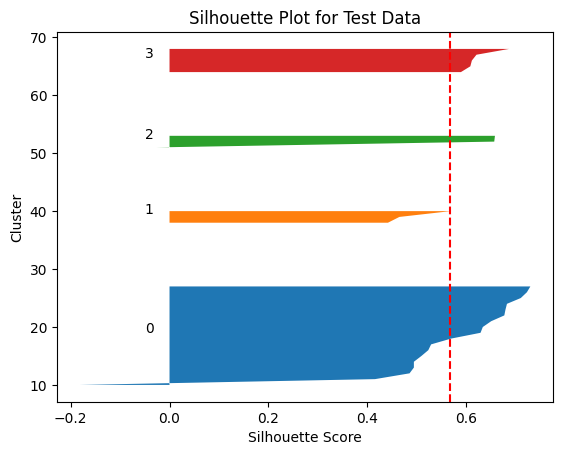

Cluster Centers:
[[-0.1807171  -0.03118049]
 [-1.29814229 -1.14717712]
 [-1.33118898  1.17731491]
 [ 1.04063335  1.27220538]
 [ 1.14756389 -1.28887582]]


In [ ]:


# 클러스터 품질 평가 - 실루엣 점수 계산
silhouette_avg = silhouette_score(x_test, y_test)
print(f"Overall Silhouette Score: {silhouette_avg:.2f}")

# 실루엣 점수 시각화 - 각 데이터 포인트의 실루엣 점수를 계산
silhouette_values = silhouette_samples(x_test, y_test)

# 시각화 준비
y_lower = 10

for i in range(4): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = silhouette_values[y_test == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for Test Data")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()
# 결과 요약 - 실루엣 점수와 클러스터 중심 출력
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")

## 0번으로 분류된 포인트 중 실루엣 계수가 음수인 경우가 있으나 극 소수임임

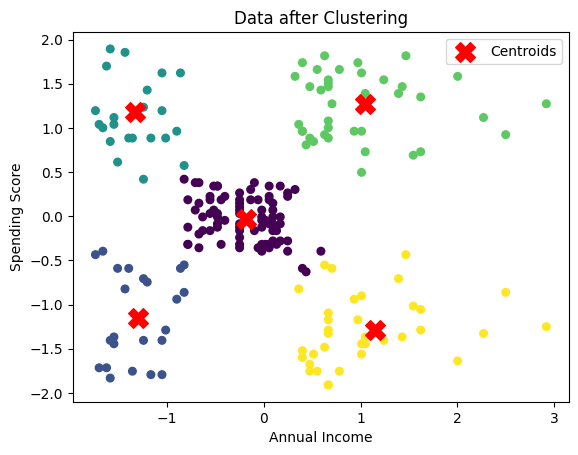

In [32]:
#  군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', s=30)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', s=30)

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [44]:
temp1 = np.hstack((x_train, y_train.reshape(-1,1)))
temp2 = np.hstack((x_test, y_test.reshape(-1,1)))
result = np.vstack((temp1, temp2))

result = pd.DataFrame(result, columns=['Annual Income', 'Spending Score', 'Cluster'])

print(result)

     Annual Income  Spending Score  Cluster
0        -0.250391       -0.318337      0.0
1         2.497807        0.923953      3.0
2        -0.899272       -0.939482      1.0
3        -1.242797       -1.405340      1.0
4         0.322150        0.302808      0.0
..             ...             ...      ...
195       0.054964        0.225165      0.0
196       0.474828        1.467455      3.0
197       0.474828        0.885132      3.0
198       0.932861       -0.939482      4.0
199      -0.250391        0.108700      0.0

[200 rows x 3 columns]


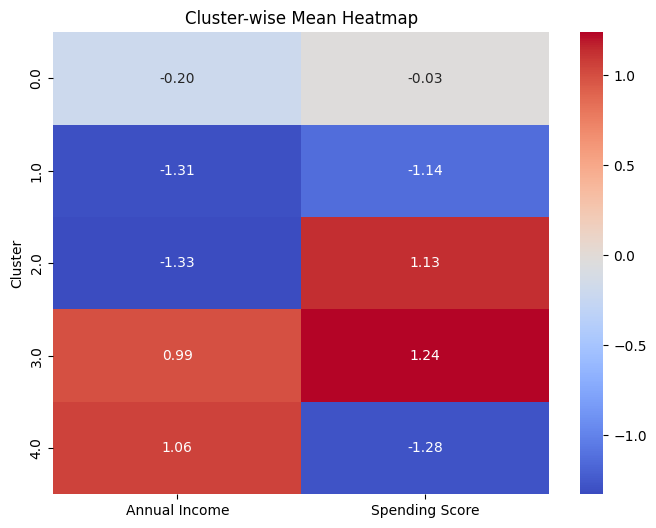

In [49]:


cluster_means = result.groupby('Cluster').mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cluster-wise Mean Heatmap")
plt.show()

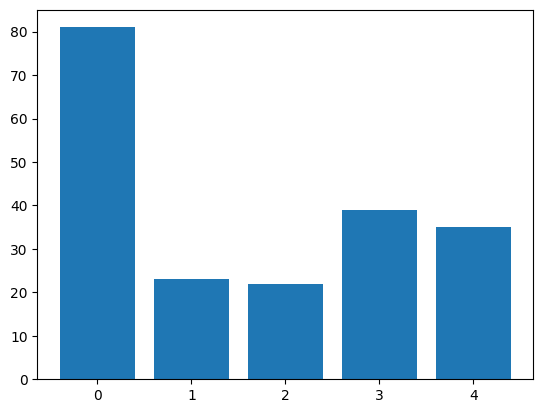

In [53]:
plt.bar([0, 1, 2, 3, 4], result.groupby('Cluster').count()['Annual Income'])
plt.show()

In [ ]:
# 클러스터 0 : 연간 소득과, 소비 점수 둘 모두 평균인 그룹
# 클러스터 1 : 연간 소득과, 소비 점수 둘 모두 평균 이하 인 그룹
# 클러스터 2 : 연간 소득 대비 소비 점수가 높은 그룹
# 클러스터 3 : 연간 소득과 소비 점수 둘 모두 평균 이상인 그룹
# 클러스터 4 : 연간 소득 대비 소비 점수가 낮은 그룹